<a href="https://colab.research.google.com/github/robson-ribeiro-da-silva/projects_data_science/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **ESTUDO DE CASO COM DATA SCIENCE**
# Detecção de Fraudes em Cartões de Crédito

<img alt="Logo" width="30%"  height="60" src="https://raw.githubusercontent.com/robson-ribeiro-da-silva/imagens/06b7c1b7ad2430cc21bd537aa63295410b1fddaa/banner_data_science_.jpg"> 

---

# **Fraudes em Cartões de Crédito**

A pandemia causada pelo Covid-19 no Brasil foi responsável pela mudança de muitos hábitos dos brasileiros, e um fator que sofreu grande impacto foi o comércio eletrônico, no qual a população aderiu ao costume de realizar compras pela internet. Segundo a Associação Brasileira de Comércio Eletrônico (ABCOMM), no ano de 2020 foi registrado um faturamento de R$ 126,3 bilhões em vendas on-line, o que representou um crescimento de 68% neste setor. Com isso, os cartões de créditos passaram a serem mais utilizados para a realização de pagamentos, representando grande parte das transações do varejo brasileiro, apesar do surgimento de novos meios de pagamento.  

Com esse cenário os criminosos estão desenvolvendo diversas técnicas de fraudes com cartões de crédito no e-commerce, tornando os golpes virtuais cada vez mais comuns e apresentando um crescimento bastante acelerado. De acordo com uma pesquisa realizada pela ACI Worldwide, os resultados permitiram conluir que 33% dos consumidores brasileiros foram vítimas de fraudes com cartões de crédito, débito e pré-pagos nos últimos cinco anos.


<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/900.jpg" width="60%"></p>

A Inteligência Artificial tem se apresentado como alternativa mais viável para solucionar esse problema recorrente envolvendo fraudes com cartóes de crédito, pois o treinamento de algoritmos de machine learning com grandes volumes de dados é possível identificar transações fraudulentas que venham a ocorrer.

**Este projeto tem o objetivo de abordar o problema das fraudes em cartões de crédito e apresentar um algoritimo de machine learning como classificador de possíveis fraudes.**

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [1]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o notebook
sns.set_style('dark')

In [2]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória

De início iremos realizar uma análise exploratória para compreender a estrutura do conjunto de dados como também identificar se tem a presença de valores nulos ou outliers.


* **Ver as 5 primeiras entradas**

A seguir visualizamos os 5 primeiros registros do dataset, onde é possível notar os nomes das colunas seguindo um padrão de nomenclatura para não expor os nomes reais dos atributos por questão de privacidade, no entanto a variavel **Time** e **Amount** ainda preservam os nomes originais. 

In [3]:
# ver as primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* **Ver o tamanho do DataFrame**

Percebemos que o conjunto de dados possue o total de 31 colunas (recursos) e 284807 entradas. 

In [4]:
# exibir o tamanho do dataset
print("Tamanho de df: {}\n".format(df.shape))

Tamanho de df: (284807, 31)



* **Ver o resumo estatístico do DataFrame**

Notamos a seguir o resumo estatístico, onde é possível identificar algumas variantes como media, mediana, os valores mínimos e máximos para cada coluna do dataframe.

In [5]:
# resumo estatístico
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


* **Identificar os tipos das variáveis**

É notável que o conjunto de dados é composto totalmente por variáveis do tipo numérica, não existindo assim a presença de variáveis categóricas.

In [6]:
# exibir os tipos das variáveis
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

* **Verificar se há valores ausentes**

Percebemos a seguir que o conjunto de dados não possue valores faltantes para as colunas existentes. 

In [7]:
# exibir as colunas com valores nulos em ordem decrescente
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

* **Plotar um gráfico de barras para ver o balanceamento do *dataset***

Visualizamos a distribuição das variáveis com a representação da predominancia dos seus valores através dos seguintes histogramas.

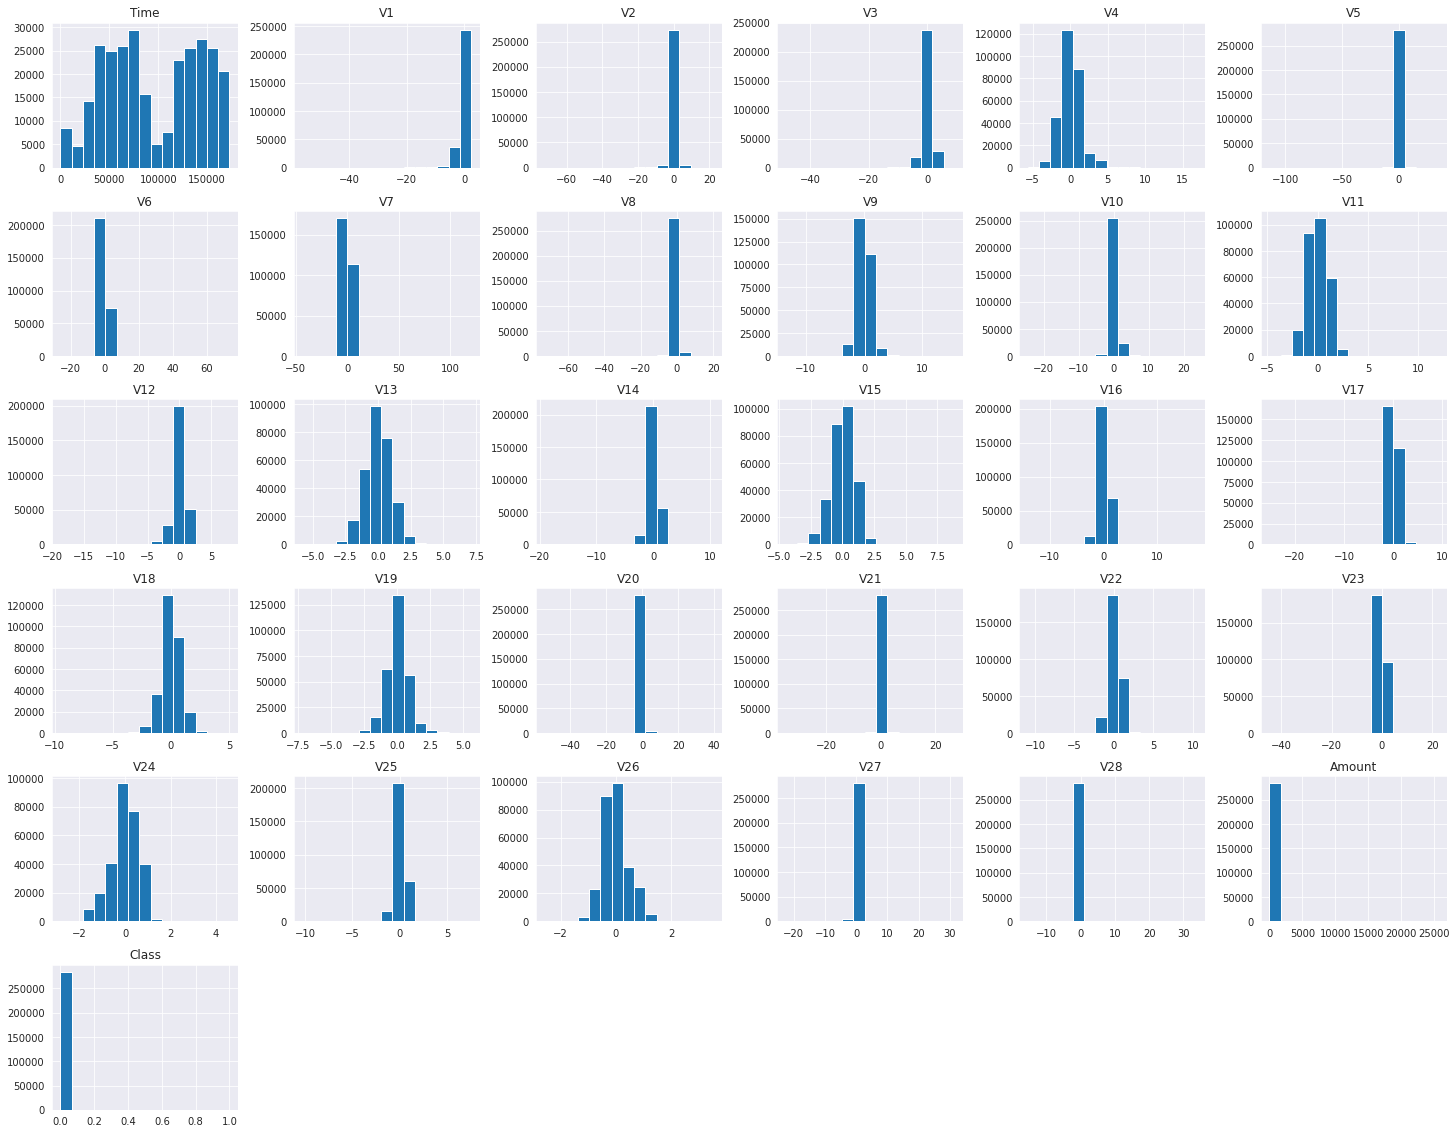

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(25,20));

* **Plotar os histogramas para a variável Time** 
  * Fraude (`Class == 1`)
  * Normal (`Class == 0`)

  A seguir, visualizamos três histogramas para a váriavel Time, o primeiro representa o gráfico com todos os dados, o segundo para os dados quando não é fraude, e o terceiro para os dados quando é fraude. 

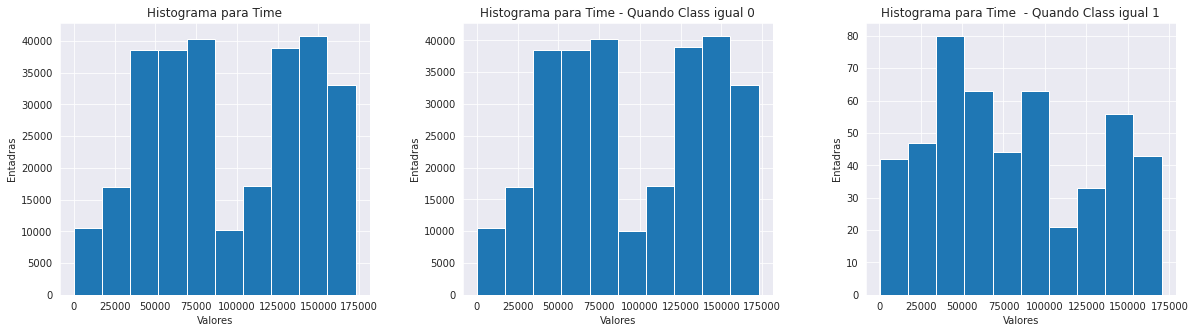

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# plotar o histograma para variavel Time
df['Time'].hist(ax=ax1);
ax1.set_title("Histograma para Time")
ax1.set_ylabel("Entadras")
ax1.set_xlabel("Valores")

# plotar o histograma para variavel Time quando Class == 0
df.loc[df.Class == 0, ['Time']].hist(ax=ax2);
ax2.set_title("Histograma para Time - Quando Class igual 0")
ax2.set_ylabel("Entadras")
ax2.set_xlabel("Valores")

# plotar o histograma para variavel Time quando Class == 1
df.loc[df.Class == 1, ['Time']].hist(ax=ax3);
ax3.set_title("Histograma para Time  - Quando Class igual 1")
ax3.set_ylabel("Entadras")
ax3.set_xlabel("Valores")

plt.show()

* **Plotar os histogramas para a variável Amount** 
  * Fraude (`Class == 1`)
  * Normal (`Class == 0`)

  A seguir, visualizamos três histogramas para a váriavel Amount, o primeiro representa o gráfico com todos os dados, o segundo para os dados quando não é fraude, e o terceiro para os dados quando é fraude. 

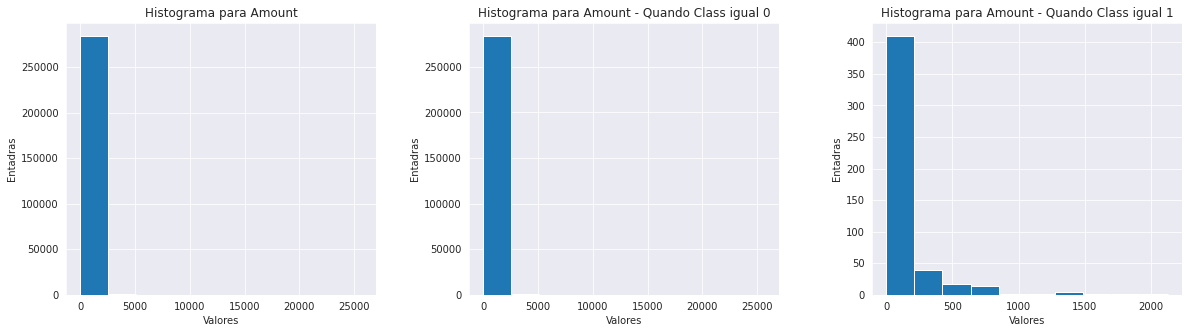

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# plotar o histograma para variavel Time
df['Amount'].hist(ax=ax1);
ax1.set_title("Histograma para Amount")
ax1.set_ylabel("Entadras")
ax1.set_xlabel("Valores")

# plotar o histograma para variavel Time quando Class == 0
df.loc[df.Class == 0, ['Amount']].hist(ax=ax2);
ax2.set_title("Histograma para Amount - Quando Class igual 0")
ax2.set_ylabel("Entadras")
ax2.set_xlabel("Valores")

# plotar o histograma para variavel Time quando Class == 1
df.loc[df.Class == 1, ['Amount']].hist(ax=ax3);
ax3.set_title("Histograma para Amount - Quando Class igual 1")
ax3.set_ylabel("Entadras")
ax3.set_xlabel("Valores")

plt.show()

* **Ver a matriz de correlação**

A seguir visualizamos a matriz de correlação para as variáveis do conjunto de dados, e nela percebemos que o grau de dependência entre as variáveis é relativamente pequena, o que demonstra pouca correlação. 

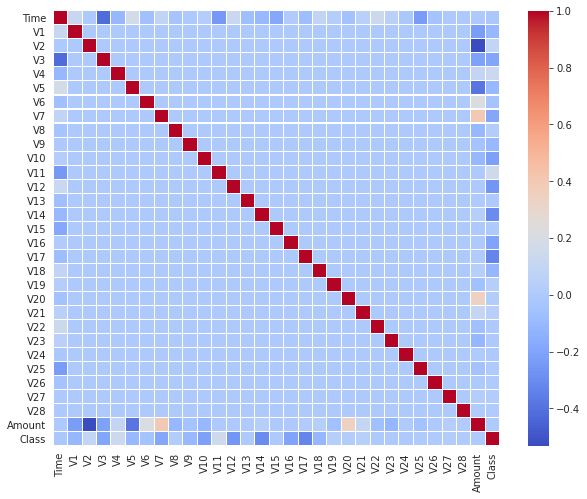

In [72]:
# criar uma matriz de correlação
corr = df.corr()

fig, ax = plt.subplots(figsize = (10,8))

# matriz de correlação
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="coolwarm", ax=ax);

* **Plotar boxplot para a variável Amount quando houve Fraude**

Visualizamos a distribuição dos valores para a variável Amount quando **Houve Fraude**.

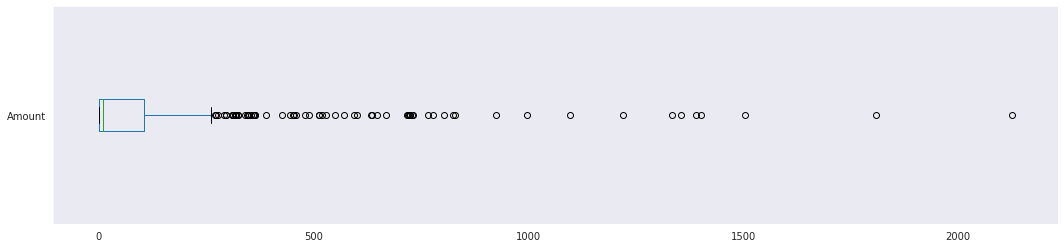

In [11]:
# plotar o boxplot para variavel Amount quando Class == 1
df.loc[df.Class == 1, ['Amount']].plot(kind='box', vert=False, figsize=(18, 4));

* **Plotar boxplot para a variável Amount quando Não houve Fraude**

Visualizamos a distribuição dos valores para a variável Amount quando **Não Houve Fraude**.

*É notável qua a quantidade de entradas para os casos de não ocorrência de fraude é bem maior que quando é um registro de fraude.*

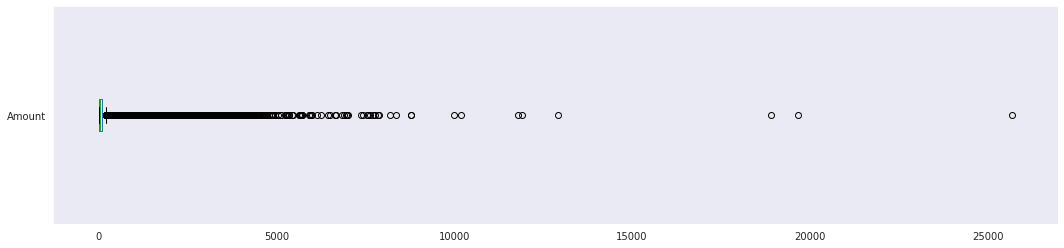

In [13]:
# plotar o boxplot para variavel Amount quando Class == 0
df.loc[df.Class == 0, ['Amount']].plot(kind='box', vert=False, figsize=(18, 4));

Os boxplots permitiram notarmos a presença de alguns valores discrepantes para a variável Amount, então é preciso realizar limpeza desses dados para que não prejudiquem o treinamento do modelo. Nas etapas a seguir, será realizado o ajuste e padronização desses dados.

## Preparação dos Dados



**Padronizar Time e Amount**

As variáveis Time e Amount ainda necessitam de serem processadas para seguirem o padrão do conjunto de dados, e como foi percebido anteriormente a coluna Amount possui alguns outliers, então será usada a classe StandardScaler para padronização.

In [73]:
# padronizar as colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


## Modelo de Machine Learning

Nesta etapa de construção do Modelo de Machine Learning, seguiremos algumas etapas necessárias:

**1**- Escolher o modelo de classificação
 
**2** - Instanciar o hyperparâmetro do modelo

**3** - Preparação dos dados

**3.1** - Dividir o conjunto de dados entre treino e teste

**3.2** - Balancear o conjunto de dados

**4** - Treinar o modelo

**5** - Realizar previsões

In [ ]:
# importar scikit-learn para criar o modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

# 2. Instanciar e escolher os hyperparameters
model = LogisticRegression()

# 3. Separar os dados entre feature matrix e target vector (preparação dos dados) 
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

# 3.2 usar técnica under-sampling para balancear o conjunto de dados
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# 4. Fit do modelo (treinar)
model.fit(X_rus, y_rus)

# 5. Fazer previsões em cima de novos dados
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

* **Ver a nova matriz de correlação após a padronização dos dados**

Após a padronização, percebemos que a matriz de correlação agora apresenta um grau maior de dependência entre as variáveis. 

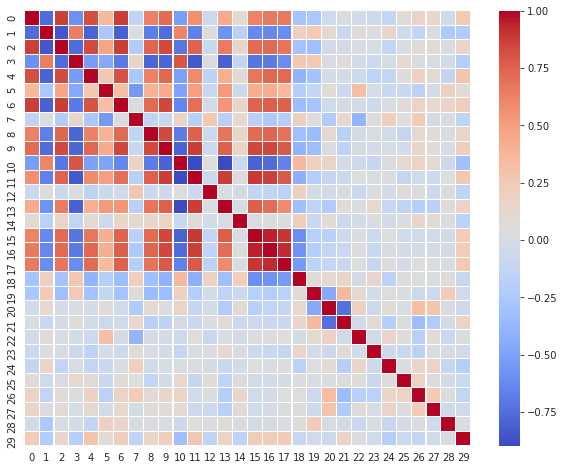

In [71]:
# criar uma matriz de correlação
corr = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(figsize = (10,8))

# matriz de correlação
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax);

## Avaliar o desempenho do modelo

* Identificar a melhor métrica para esse tipo de modelo
* [*Opcional*] Comparar o desempenho entre diversos modelos

In [45]:
# imprimir relatório de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71079
           1       0.05      0.90      0.09       123

    accuracy                           0.97     71202
   macro avg       0.52      0.94      0.54     71202
weighted avg       1.00      0.97      0.98     71202



In [23]:
#@title
# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot
import scikitplot as skplt

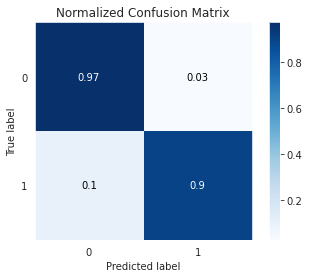

In [46]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

## Conclusão

* Conclusões a respeito da construção do modelo